In [1]:
import numpy as np
import proplot as pplt
from matplotlib.patches import Rectangle
import matplotlib.colors as colors
from qplots import plot_squeezing

In [5]:
c0 = "black"

last_x = 0

def box(ax, s, l, c, ec=None, a=1, nump=1000, label=None, label_rot="horizontal", label_size=8, label_color="black", lw=0.5):
  global last_x
  
  if ec is None:
    ec = c
    
  x0 = last_x + s
  x1 = x0 + l
    
  ax.plot([last_x, x0], [0, 0], color=ec, lw=lw)
  ax.plot([x0, x0, x1, x1], a*np.array([0, 1, 1, 0]), color=ec, lw=lw)

  fc = colors.to_rgb(c)
  fc += (0.3,)
  ax.add_patch(Rectangle([x0, 0], x1 - x0, a, color=fc))
  last_x = x1

  #if label is not None:
  #  ax.text((last_x + x0)/2, a/2, label, ha="center", va="center", fontsize=0.8*label_size, rotation=label_rot,
  #         color=label_color)

def pulse_f(xc, sig, f, c, nump=1000, nsig=6):
  global last_x
  
  xc = last_x + xc

  # ensure the sweeps ends at 0
  x = np.linspace(xc - nsig*sig, xc + nsig*sig, nump)
  y = np.exp(-(x-xc)**2/(2*sig**2))*np.sin(f*x)
  
  pplt.plot([last_x, x[0]], [0,0], color=c0)
  last_x = x[-1]

  pplt.plot(x, y, color=c)

def pulse(xc, sig, c, nump=1000, nsig=3, a=1):
  global last_x
  
  xc = last_x + xc

  # ensure the sweeps ends at 0
  x = np.linspace(xc - nsig*sig, xc + nsig*sig, nump)
  y = a*np.exp(-(x-xc)**2/(2*sig**2))
  
  pplt.plot([last_x, x[0]], [0,0], color=c0)
  last_x = x[-1]

  pplt.plot(x, y, color=c)

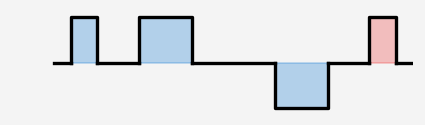

In [6]:
fig, axs = pplt.subplots([[1]], refwidth=2, refheight=0.5)

mF_f = 20
main_f = 100

lbs = 10
s = 0.5
last_x = s
lw = 1.2
ec = "black"

axs[0].plot([0], [0], color=ec, lw=lw)

# pi/2
box(axs[0], 0.2, 0.32, "blue7", ec=ec, label=r'$\frac{\pi}{2}_y$', label_size=lbs, lw=lw)
# pi
box(axs[0], 0.5, 0.64, "blue7", ec=ec, label=r'$\pi_y$', label_size=lbs, lw=lw)
# -pi
box(axs[0], 1, 0.64, "blue7", ec=ec, a=-1, label=r'$\pi_{-y}$', label_size=lbs, lw=lw)
# readout
box(axs[0], 0.5, 0.32, "red7", ec=ec, label=r'$\frac{\pi}{2}_{\phi}$', label_size=lbs, lw=lw)

axs[0].plot([last_x, last_x+0.2], [0,0], color=ec, lw=lw)

axs[0].set_axis_off()

fig.savefig("figures/contrast_ps.pdf")

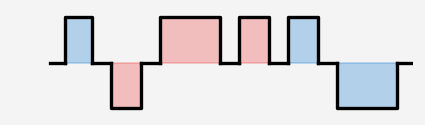

In [7]:
fig, axs = pplt.subplots([[1]], refwidth=2, refheight=0.5)

mF_f = 20
main_f = 100

lbs = 10
s = 0.5
last_x = s
lw = 1.2
ec = "black"

axs[0].plot([0], [0], color=ec, lw=lw)

# pi/2 x
box(axs[0], 0.2, 0.36, "blue7", ec=ec, label=r'$\frac{\pi}{2}_x$', label_size=lbs, lw=lw)

# pi/2 -y
box(axs[0], 0.25, 0.4, "red7", ec=ec, a=-1, label=r'$\frac{-\pi}{2}_{y}$', label_size=lbs, lw=lw)
# pi y
box(axs[0], 0.25, 0.8, "red7", ec=ec, a=1, label=r'$\pi_{y}$', label_size=lbs, lw=lw)
# pi/2 y
box(axs[0], 0.25, 0.4, "red7", ec=ec, a=1, label=r'$\frac{\pi}{2}_{y}$', label_size=lbs, lw=lw)
# pi/2 x
box(axs[0], 0.25, 0.4, "blue7", ec=ec, a=1, label=r'$\frac{\pi}{2}_{x}$', label_size=lbs, lw=lw)
# pi -x
box(axs[0], 0.25, 0.8, "blue7", ec=ec, a=-1, label=r'$-\pi_{x}$', label_size=lbs, lw=lw)

axs[0].plot([last_x, last_x+0.2], [0,0], color=ec, lw=lw)

axs[0].set_axis_off()

fig.savefig("figures/wahuha_ps.pdf")

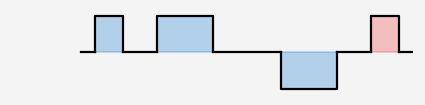

In [8]:
fig, axs = pplt.subplots([[1]], refwidth=2, refheight=0.4)


mF_f = 20
main_f = 100

lbs = 10
s = 0.5
last_x =s
lw = 0.8
ec = "black" #"#8f1409"

axs[0].plot([0], [0], color=ec, lw=lw)

# pi/2
box(axs[0], 0.1, 0.2, "blue7", ec=ec, label=r'$\frac{\pi}{2}_y$', label_size=lbs, lw=lw)
# pi
box(axs[0], 0.25, 0.4, "blue7", ec=ec, label=r'$\pi_y$', label_size=lbs, lw=lw)
# -pi
box(axs[0], 0.5, 0.4, "blue7", ec=ec, a=-1, label=r'$\pi_{-y}$', label_size=lbs, lw=lw)
# readout
box(axs[0], 0.25, 0.2, "red7", ec=ec, label=r'$\theta_{x}$', label_size=lbs, lw=lw)

axs[0].plot([last_x, last_x+0.1], [0,0], color=ec, lw=lw)

axs[0].set_axis_off()

fig.savefig("figures/squeezing_ps.pdf")

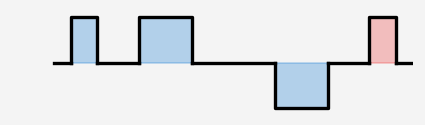

In [9]:
fig, axs = pplt.subplots([[1]], refwidth=2, refheight=0.5)

mF_f = 20
main_f = 100

lbs = 10
s = 0.5
last_x = s
lw = 1.2
ec = "black"

axs[0].plot([0], [0], color=ec, lw=lw)

# pi/2
box(axs[0], 0.2, 0.32, "blue7", ec=ec, label=r'$\frac{\pi}{2}_y$', label_size=lbs, lw=lw)
# pi
box(axs[0], 0.5, 0.64, "blue7", ec=ec, label=r'$\pi_y$', label_size=lbs, lw=lw)
# -pi
box(axs[0], 1, 0.64, "blue7", ec=ec, a=-1, label=r'$\pi_{-y}$', label_size=lbs, lw=lw)
# readout
box(axs[0], 0.5, 0.32, "red7", ec=ec, label=r'$\frac{\pi}{2}_{x}$', label_size=lbs, lw=lw)

axs[0].plot([last_x, last_x+0.2], [0,0], color=ec, lw=lw)

axs[0].set_axis_off()

fig.savefig("figures/mean_field_ps.pdf")